In [2]:
# Example for window size = 5
import pandas as pd

data = pd.read_csv('./Data/gold.csv')
data.Date = pd.to_datetime(data.Date,format='%Y-%m-%d') #%Y-%m-%d
data.set_index('Date',inplace=True)
data = data.asfreq('b','ffill')
del data['Currency']
print(data.head()) 

# Create lag features (e.g., using the last 5 days of prices)
data['T-5'] = data['Close'].shift(5)
data['T-4'] = data['Close'].shift(4)
data['T-3'] = data['Close'].shift(3)
data['T-2'] = data['Close'].shift(2)
data['T-1'] = data['Close'].shift(1)

# The 'Target' column is the current price to predict
data['Target'] = data['Close'] 

# Drop rows with NaN values (first few rows won't have lagged values)
data = data.dropna() 


             Open   High    Low  Close  Volume
Date                                          
2000-01-04  281.0  281.0  281.0  282.7       4
2000-01-05  283.2  283.2  283.2  281.1      16
2000-01-06  281.4  281.4  281.4  281.4       0
2000-01-07  281.9  281.9  281.9  281.9       0
2000-01-10  281.7  281.7  281.7  281.7       0


In [3]:
X = data[['T-5', 'T-4', 'T-3', 'T-2', 'T-1']]  # Lag features
y = data['Target']  # Gold price to predict

print(X.head())  # Features
print(y.head())  # Target


              T-5    T-4    T-3    T-2    T-1
Date                                         
2000-01-11  282.7  281.1  281.4  281.9  281.7
2000-01-12  281.1  281.4  281.9  281.7  283.4
2000-01-13  281.4  281.9  281.7  283.4  282.7
2000-01-14  281.9  281.7  283.4  282.7  284.1
2000-01-17  281.7  283.4  282.7  284.1  283.9
Date
2000-01-11    283.4
2000-01-12    282.7
2000-01-13    284.1
2000-01-14    283.9
2000-01-17    283.9
Freq: B, Name: Target, dtype: float64


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(X_train.shape, X_test.shape)  # Check the sizes of the splits


(4665, 5) (1167, 5)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model with 5 neighbors
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

print(y_pred[:5])  # View the first few predictions


[1284.98 1289.78 1281.   1279.82 1286.42]


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def evaluate_model(y_test, y_pred):
    """
    Calculate and print evaluation metrics.
    """
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mse, mae, mape


## Testing Multiple k Values

In [7]:
k_values = range(1, 21)  # Range of k values to test
results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Evaluate and store results
    mse, mae, mape = evaluate_model(y_test, y_pred)
    results.append({'k': k, 'MSE': mse, 'MAE': mae, 'MAPE': mape})

# Display results
for res in results:
    print(f"k={res['k']}: MSE={res['MSE']:.2f}, MAE={res['MAE']:.2f}, MAPE={res['MAPE']:.2%}")


k=1: MSE=2228.25, MAE=30.61, MAPE=1.79%
k=2: MSE=1858.50, MAE=27.04, MAPE=1.56%
k=3: MSE=1888.04, MAE=26.83, MAPE=1.55%
k=4: MSE=1759.28, MAE=25.73, MAPE=1.48%
k=5: MSE=1611.07, MAE=24.69, MAPE=1.42%
k=6: MSE=1744.80, MAE=25.06, MAPE=1.44%
k=7: MSE=1868.34, MAE=25.77, MAPE=1.47%
k=8: MSE=1984.46, MAE=26.28, MAPE=1.50%
k=9: MSE=2027.39, MAE=26.60, MAPE=1.51%
k=10: MSE=2011.69, MAE=26.55, MAPE=1.51%
k=11: MSE=1999.36, MAE=26.53, MAPE=1.51%
k=12: MSE=2019.00, MAE=26.72, MAPE=1.52%
k=13: MSE=2022.63, MAE=26.74, MAPE=1.52%
k=14: MSE=1981.29, MAE=26.62, MAPE=1.51%
k=15: MSE=2037.15, MAE=26.88, MAPE=1.52%
k=16: MSE=2082.44, MAE=27.13, MAPE=1.53%
k=17: MSE=2093.36, MAE=27.26, MAPE=1.54%
k=18: MSE=2111.34, MAE=27.37, MAPE=1.55%
k=19: MSE=2117.83, MAE=27.41, MAPE=1.55%
k=20: MSE=2141.94, MAE=27.60, MAPE=1.56%


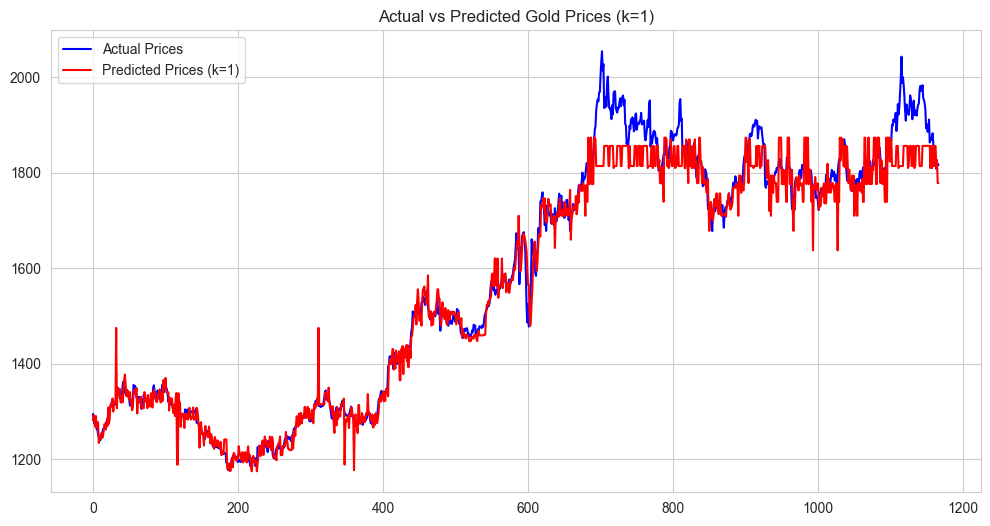

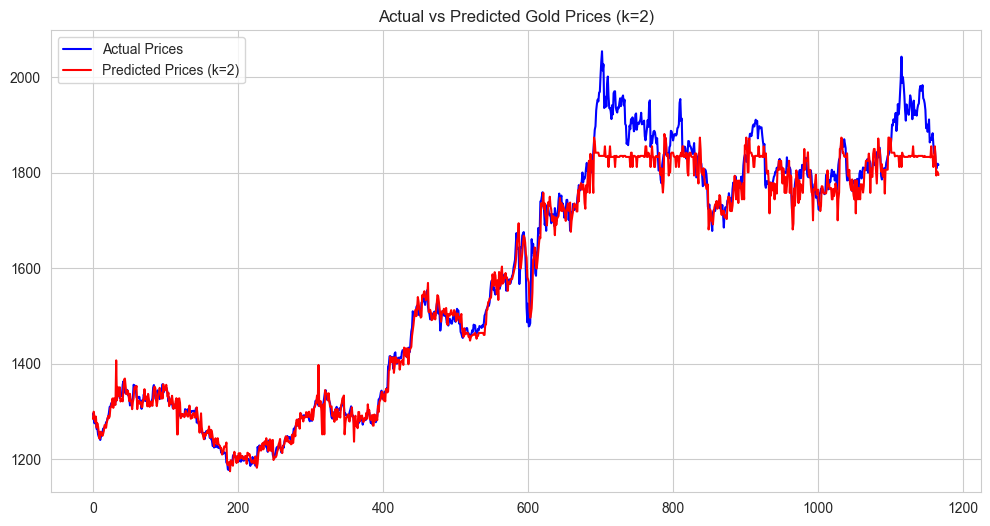

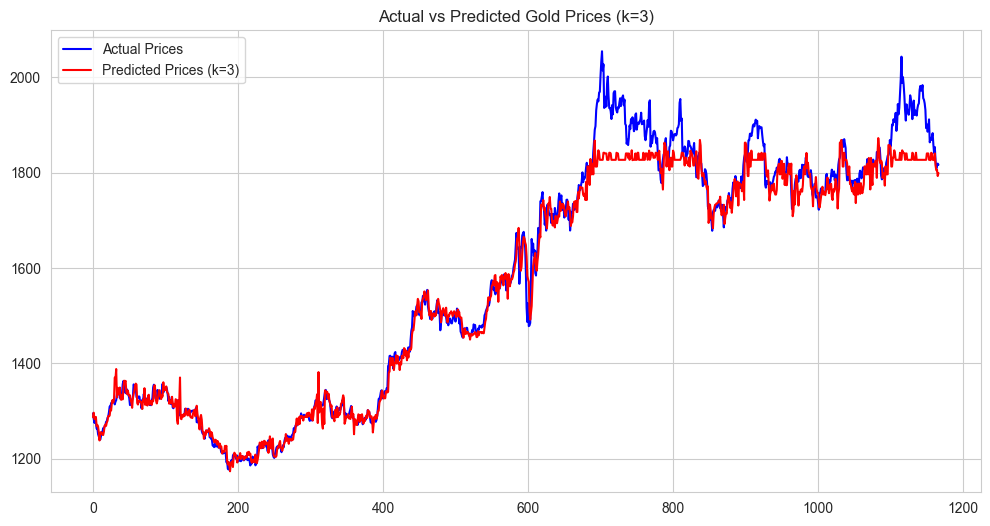

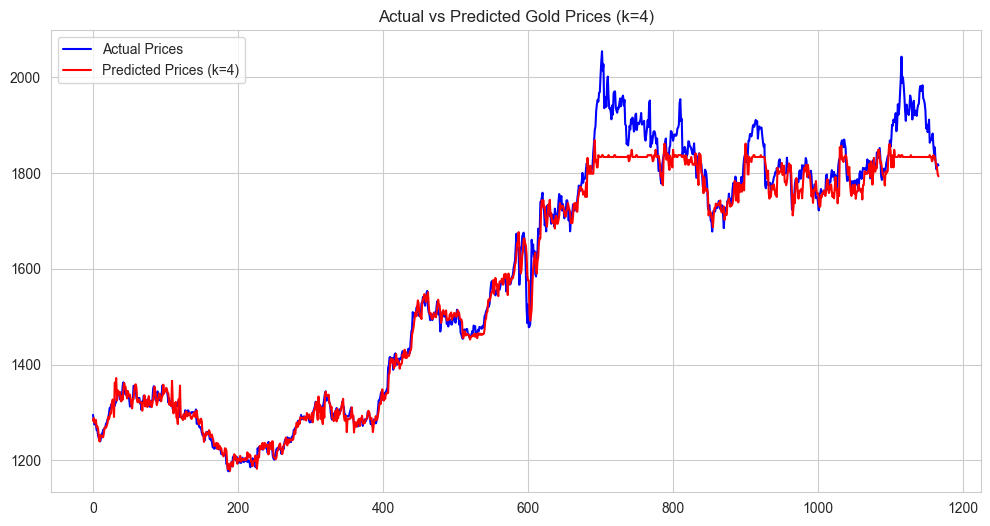

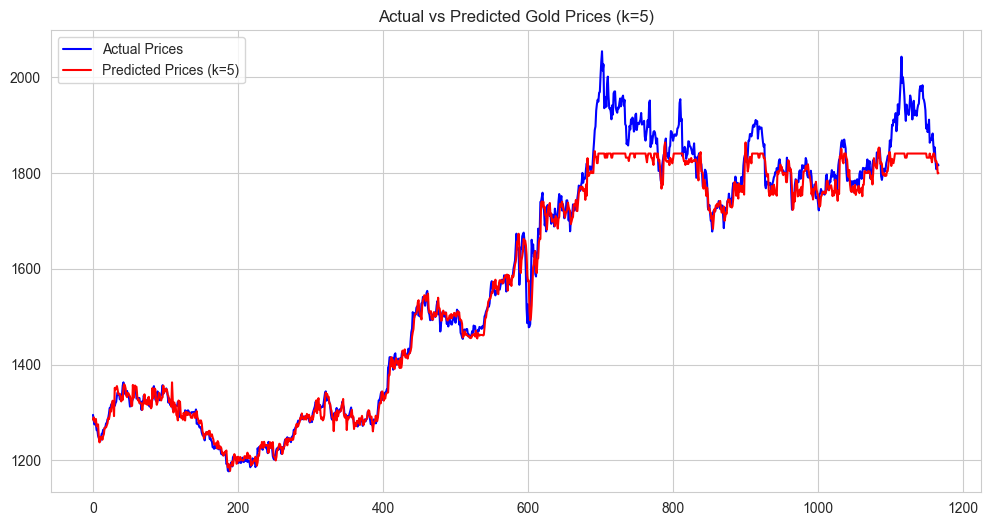

In [8]:
import matplotlib.pyplot as plt

k_values = range(1, 6)  # Use a smaller range for visualization clarity

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Plot predictions for this k
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='blue')
    plt.plot(y_pred, label=f'Predicted Prices (k={k})', color='red')
    plt.title(f'Actual vs Predicted Gold Prices (k={k})')
    plt.legend()
    plt.show()


## Testing Different Metrics

In [9]:
metrics = ['euclidean', 'manhattan', 'minkowski']
metric_results = {}

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Evaluate and store results
    mse, mae, mape = evaluate_model(y_test, y_pred)
    metric_results[metric] = {'MSE': mse, 'MAE': mae, 'MAPE': mape}

# Display results
for metric, res in metric_results.items():
    print(f"Metric={metric}: MSE={res['MSE']:.2f}, MAE={res['MAE']:.2f}, MAPE={res['MAPE']:.2%}")

Metric=euclidean: MSE=1611.07, MAE=24.69, MAPE=1.42%
Metric=manhattan: MSE=1582.88, MAE=24.66, MAPE=1.42%
Metric=minkowski: MSE=1611.07, MAE=24.69, MAPE=1.42%


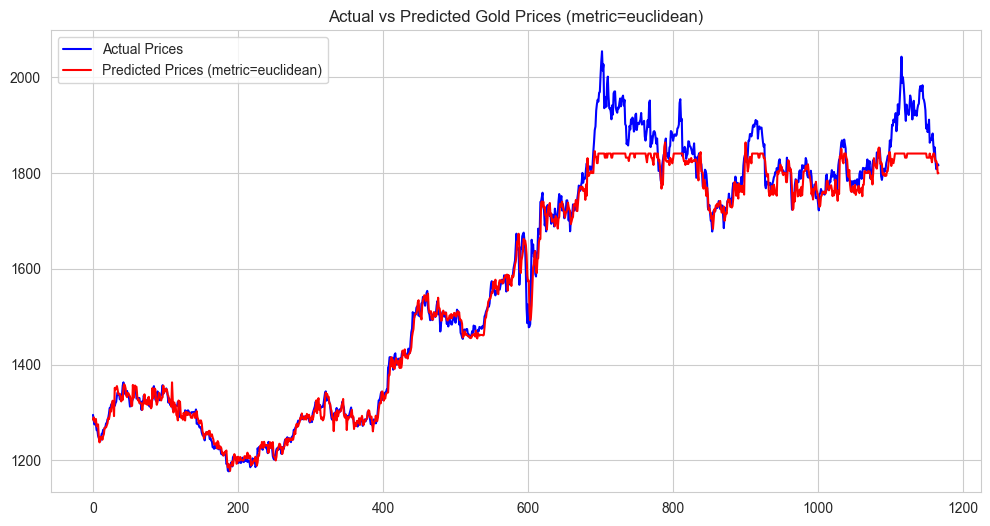

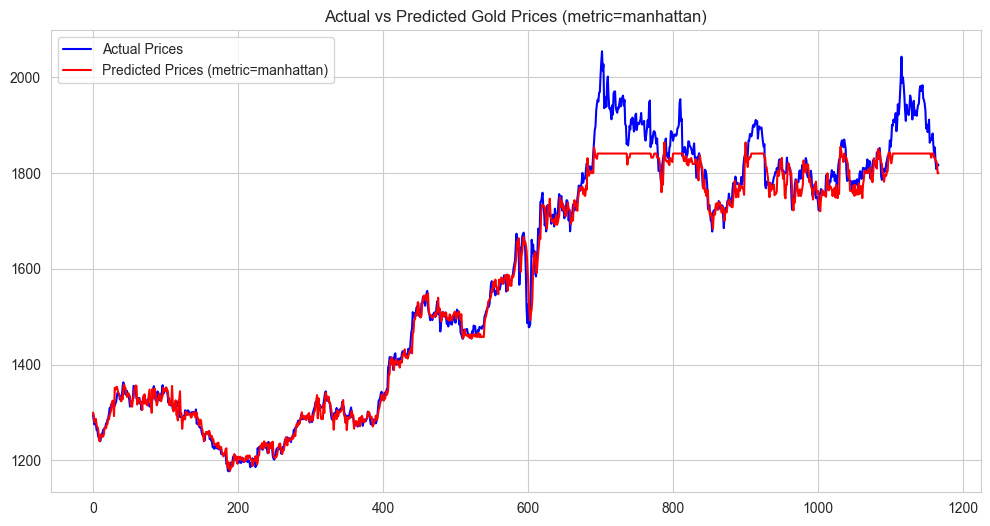

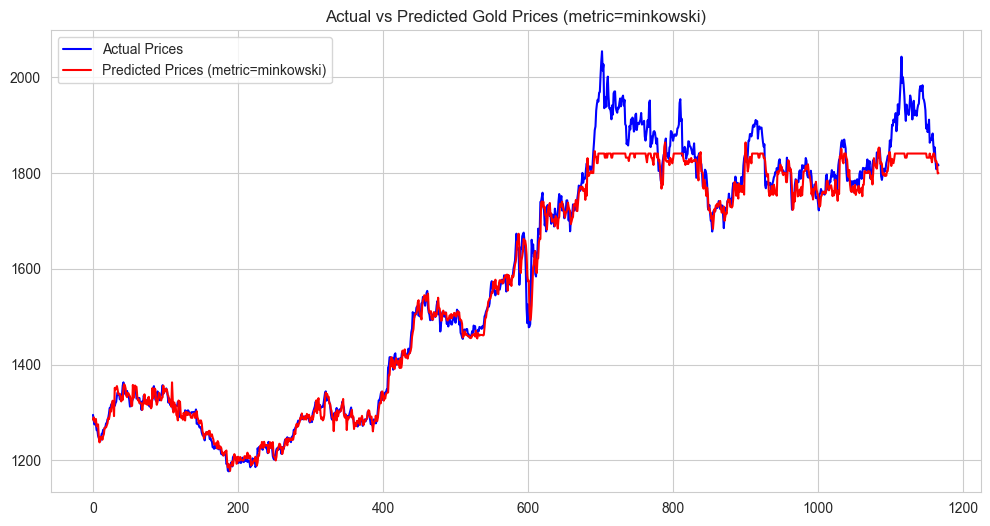

In [10]:
metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Plot predictions for this metric
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='blue')
    plt.plot(y_pred, label=f'Predicted Prices (metric={metric})', color='red')
    plt.title(f'Actual vs Predicted Gold Prices (metric={metric})')
    plt.legend()
    plt.show()

In [11]:
splits = [0.2, 0.3, 0.4]  # Test different splits
split_results = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42, shuffle=False)
    knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Evaluate and store results
    mse, mae, mape = evaluate_model(y_test, y_pred)
    split_results.append({'split': split, 'MSE': mse, 'MAE': mae, 'MAPE': mape})

# Display results
for res in split_results:
    print(f"Split {1-res['split']:.0%}/{res['split']:.0%}: MSE={res['MSE']:.2f}, MAE={res['MAE']:.2f}, MAPE={res['MAPE']:.2%}")


Split 80%/20%: MSE=1611.07, MAE=24.69, MAPE=1.42%
Split 70%/30%: MSE=1165.36, MAE=20.71, MAPE=1.29%
Split 60%/40%: MSE=1057.13, MAE=20.43, MAPE=1.35%


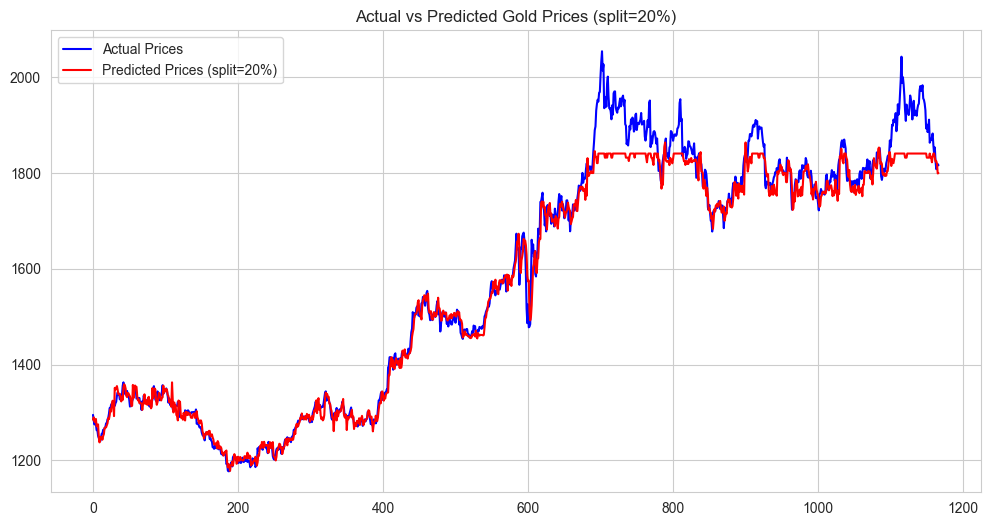

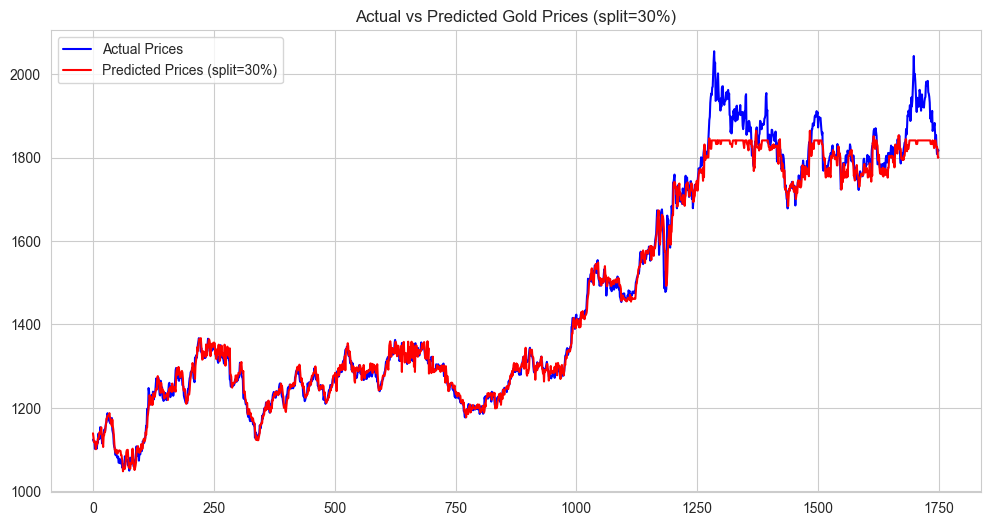

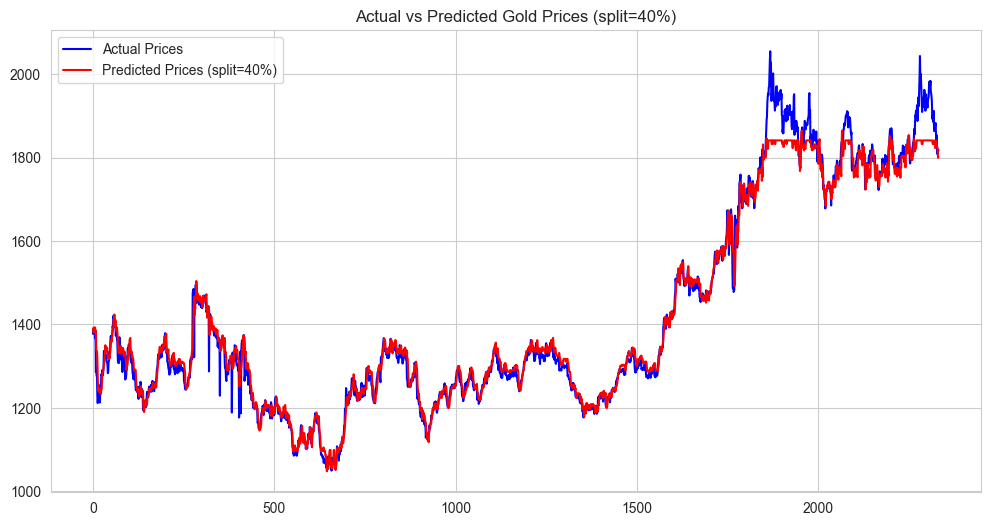

In [12]:
splits = [0.2, 0.3, 0.4]

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42, shuffle=False)
    knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Plot predictions for this split
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='blue')
    plt.plot(y_pred, label=f'Predicted Prices (split={split:.0%})', color='red')
    plt.title(f'Actual vs Predicted Gold Prices (split={split:.0%})')
    plt.legend()
    plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define MAPE scorer
def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

scorer = make_scorer(mape_scorer, greater_is_better=False)

param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, scoring=scorer, cv=5)
grid.fit(X, y)

# Display the best parameters and MAPE score
print(f'Best parameters: {grid.best_params_}')
print(f'Best MAPE score: {-grid.best_score_:.2%}')


Best parameters: {'metric': 'euclidean', 'n_neighbors': 7}
Best MAPE score: 8.51%


D:\PyCharm\Project\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
